In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np

dir = "data"
files = [dir + '/' + fname for fname in os.listdir(dir) if '.csv' in fname]

In [2]:
# load data
frames = []
for fname in files:
    frames.append(pd.read_csv(fname))
df = pd.concat(frames).sort_index(level="nw")

In [ ]:
df.shape

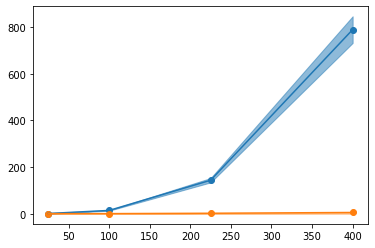

In [4]:
# compute mean and variance in computation time
N=4
nw = [df.loc[df.index==i]["nw"].iloc[0] for i in range(N)]
ta = np.array([df.loc[df.index==i]["ta"] for i in range(N)])
tk0 = np.array([df.loc[df.index==i]["tk0"] for i in range(N)])
tk1 = np.array([df.loc[df.index==i]["tk1"] for i in range(N)])
tk = tk0+tk1
tr = np.array([df.loc[df.index==i]["tr"] for i in range(N)])

ta_avg = np.average(ta,axis=1)
tk0_avg = np.average(tk0,axis=1)
tk1_avg = np.average(tk1,axis=1)
tk_avg = np.average(tk,axis=1)
tr_avg = np.average(tr,axis=1)

ta_std= np.std(ta,axis=1)
tk0_std= np.std(tk0,axis=1)
tk1_std = np.std(tk1,axis=1)
tk_std= np.std(tk,axis=1)
tr_std= np.std(tr,axis=1)
plt.plot(nw,ta_avg)
plt.scatter(nw,ta_avg,color="C0")
plt.fill_between(nw,ta_avg-ta_std,ta_avg+ta_std, alpha=.5,color="C0")
plt.plot(nw,tk_avg,color="C1")
plt.scatter(nw,tk_avg,color="C1")
# plt.plot(nw,tr_avg)
plt.fill_between(nw,tr_avg-tr_std,tr_avg+tr_std,alpha=.5,color="C1")

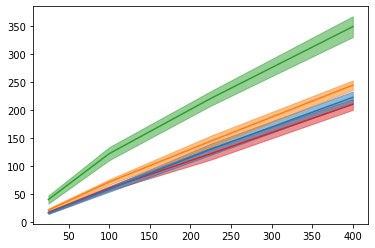

In [5]:
# cost data
cg = np.array([df.loc[df.index==i]["cg"] for i in range(N)])
ca = np.array([df.loc[df.index==i]["ca"] for i in range(N)])
ck = np.array([df.loc[df.index==i]["ck"] for i in range(N)])
cr = np.array([df.loc[df.index==i]["cr"] for i in range(N)])
# pr = 100*(cr-cg)/(ca-cg)
# pk = 100*(ck-cg)/(ca-cg)
# pr = 100*ca/cr
# pk = 100*ca/ck
# pg = 100*ca/cg
pr = 100*(cr/ca-1)
pk = 100*(ck/ca-1)
pg = 100*(cg/ca-1)

cg_avg = np.average(cg,axis=1)
ca_avg = np.average(ca,axis=1)
ck_avg = np.average(ck,axis=1)
cr_avg = np.average(cr,axis=1)
pk_avg = np.average(pk,axis=1)
pr_avg = np.average(pr,axis=1)
pg_avg = np.average(pg,axis=1)
cg_std= np.std(cg,axis=1)
ca_std= np.std(ca,axis=1)
ck_std= np.std(ck,axis=1)
cr_std= np.std(cr,axis=1)
pk_std= np.std(pk,axis=1)
pr_std= np.std(pr,axis=1)
pg_std= np.std(pg,axis=1)

plt.plot()
plt.plot(nw,cg_avg,color="C3")
plt.fill_between(nw,cg_avg-cg_std,cg_avg+cg_std,alpha=.5,color="C3")
plt.plot(nw,ca_avg,color="C0")
plt.fill_between(nw,ca_avg-ca_std,ca_avg+ca_std,alpha=.5,color="C0")
plt.plot(nw,ck_avg,color="C1")
plt.fill_between(nw,ck_avg-ck_std,ck_avg+ck_std,alpha=.5,color="C1")
plt.plot(nw,cr_avg,color="C2")
plt.fill_between(nw,cr_avg-cr_std,cr_avg+cr_std,alpha=.5,color="C2")

# plt.plot(nw,pr_avg,color="C0")
# plt.fill_between(nw,pr_avg-pr_std,pr_avg+pr_std,alpha=.5,color="C0")
# plt.plot(nw,pk_avg,color="C1")
# plt.fill_between(nw,pk_avg-pk_std,pk_avg+pk_std,alpha=.5,color="C1")
# pk_avg

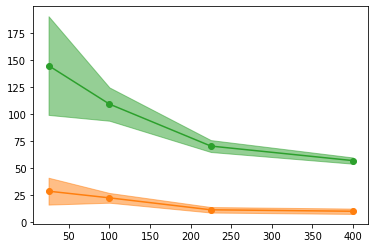

In [6]:
plt.plot(nw,pk_avg,color="C1")
plt.scatter(nw,pk_avg,color="C1")
plt.fill_between(nw,pk_avg-pk_std,pk_avg+pk_std,alpha=.5,color="C1")
plt.plot(nw,pr_avg,color="C2")
plt.scatter(nw,pr_avg,color="C2")
plt.fill_between(nw,pr_avg-pr_std,pr_avg+pr_std,alpha=.5,color="C2")

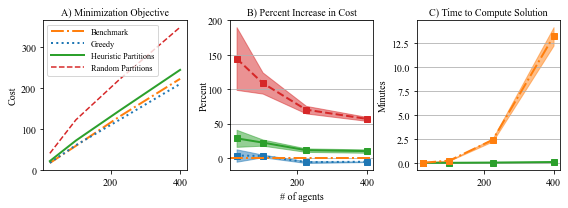

In [7]:
import matplotlib
matplotlib.rcParams["font.family"] = ["serif"]
matplotlib.rcParams["font.serif"] = ["Times New Roman"]
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(8,3))
# axs[0].plot(nw, cg_avg, marker="s", linewidth=1.5, markersize=6, color="C0")
# axs[0].plot(nw, ck_avg, marker="o", linewidth=1.5, markersize=6, color="C2")
# axs[0].plot(nw, ca_avg, marker="*", linewidth=2, markersize=6, color="C1")
# axs[0].plot(nw, cr_avg, marker="^", color="C3", markersize=6, linewidth=1.5)
axs[0].plot(nw, ca_avg, linewidth=2, markersize=6, color="C1",linestyle="dashdot")
axs[0].plot(nw, cg_avg, linewidth=2, markersize=6, color="C0",linestyle="dotted")
axs[0].plot(nw, ck_avg, linewidth=2, markersize=6, color="C2",linestyle="solid")
axs[0].plot(nw, cr_avg, color="C3", markersize=6, linewidth=1.5,linestyle="dashed")
axs[0].legend(["Benchmark","Greedy", "Heuristic Partitions", "Random Partitions"], 
                bbox_to_anchor=(0,1),loc="upper left",fontsize="small",handlelength=4.0)
axs[0].set_title("A) Minimization Objective",fontsize="medium")
axs[0].set_ylabel("Cost", fontsize="medium")

axs[1].plot([],[],marker="s")
axs[1].plot(nw, pk_avg,color="C2", linewidth=2, linestyle="solid", marker="s")
axs[1].fill_between(nw,pk_avg-pk_std,pk_avg+pk_std,color="C2",alpha=.5)
axs[1].plot(nw,pr_avg,linewidth=2,color="C3",linestyle="dashed",marker="s")
axs[1].fill_between(nw,pr_avg-pr_std,pr_avg+pr_std,color="C3",alpha=.5)
axs[1].plot(nw,pg_avg,linewidth=2,color="C0",linestyle="dotted",marker="s")
axs[1].fill_between(nw,pg_avg-pg_std,pg_avg+pg_std,color="C0",alpha=.5)
axs[1].set_xlabel("# of agents", fontsize="medium")
axs[1].set_ylabel("Percent", fontsize="medium", labelpad=-1)
axs[1].set_title("B) Percent Increase in Cost",fontsize="medium")
axs[1].axhline(y=0.,color="C1",linewidth=2,linestyle="dashdot")
# axs[1].set_ylim(bottom=30.,top=100.)
axs[1].grid(visible=True,axis="y")

axs[2].fill_between(nw,(tk_avg-tk_std)/60,(tk_avg+tk_std)/60,color="C2",alpha=.5)
axs[2].plot(nw, tk_avg/60, color="C2", linewidth=2, linestyle="solid", marker="s")
axs[2].fill_between(nw,(ta_avg-ta_std)/60,(ta_avg+ta_std)/60,color="C1",alpha=.5)
axs[2].plot(nw,ta_avg/60,marker="s",markersize=6,color="C1",linewidth=2,linestyle="dashdot")
axs[2].set_ylabel("Minutes", fontsize="medium")
axs[2].set_title("C) Time to Compute Solution", fontsize="medium")
axs[2].grid(visible=True, axis="y")
plt.tight_layout()
plt.savefig("hero_fig_fuckbad.png",dpi=2000)

In [ ]:
pd.DataFrame((df["nw"],df["ta"]/(df["tk0"]+df["tk1"])))

In [ ]:
foo = pd.DataFrame()
foo["agents"] = df["nw"]
foo["speed factor"] = df["ta"]/(df["tk0"]+df["tk1"])
sns.regplot(x="agents",y="speed factor",data=foo,order=1)
D = foo.to_numpy()
n = D.shape[0]
x = D[:,[0]]
A = np.hstack((x,np.ones((n,1))))
y = D[:,[1]]
coeffs,res,rank,sigma = np.linalg.lstsq(A,y)
ymean = np.average(y)
ypred = np.array([coeffs[0]*x[i]+coeffs[1] for i in range(n)])
SS_tot = np.sum((ypred-ymean)**2)
coeff_det = 1-res/SS_tot
coeff_det

sns.boxplot(x="agents",y="speed factor",data=foo,palette="vlag")

In [ ]:
summary = pd.DataFrame()
summary["nw"] = nw
summary["pk_avg"] = np.average(pk,axis=1)
summary["ta_avg"] = ta_avg
summary["ta_std"] = ta_std
summary["tk_avg"] = tk_avg
summary["tk_std"] = tk_std
summary["average speedup"] = np.average(ta/tk,axis=1)
print(summary.to_latex())

In [9]:
cg/ca

array([[1.08951681, 1.04208752, 1.05051083, 1.13705753, 0.81414898,
        1.06298203, 1.06965433, 1.00731276],
       [1.02693211, 1.04566546, 1.04540795, 1.03091063, 1.0179367 ,
        0.98893454, 1.01676859, 1.05180472],
       [0.92876199, 0.94104923, 0.93661958, 0.91422563, 0.95929867,
        0.93796076, 0.93625004, 0.95134419],
       [0.94767037, 0.93986281, 0.94240359, 0.93784467, 0.93889805,
        0.94766417, 0.94772535, 0.94780807]])